<a href="https://colab.research.google.com/github/keshav20004/AI-Pytorch/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##Adding 2 numbers

In [6]:
import  torch
a=torch.tensor(2)
b=torch.tensor(3)
print(a+b)


tensor(5)


In [8]:
import torch
import matplotlib.pyplot as plt



def plot_results(model, distances, times):
    """
    Plots the actual data points and the model's predicted line for a given dataset.

    Args:
        model: The trained machine learning model to use for predictions.
        distances: The input data points (features) for the model.
        times: The target data points (labels) for the plot.
    """
    # Set the model to evaluation mode
    model.eval()

    # Disable gradient calculation for efficient inference
    with torch.no_grad():
        # Make predictions using the trained model
        predicted_times = model(distances)

    # Create a new figure for the plot
    plt.figure(figsize=(8, 6))

    # Plot the actual data points
    plt.plot(distances.numpy(), times.numpy(), color='orange', marker='o', linestyle='None', label='Actual Delivery Times')

    # Plot the predicted line from the model
    plt.plot(distances.numpy(), predicted_times.numpy(), color='green', marker='None', label='Predicted Line')

    # Set the title of the plot
    plt.title('Actual vs. Predicted Delivery Times')
    # Set the x-axis label
    plt.xlabel('Distance (miles)')
    # Set the y-axis label
    plt.ylabel('Time (minutes)')
    # Display the legend
    plt.legend()
    # Add a grid to the plot
    plt.grid(True)
    # Show the plot
    plt.show()



def plot_nonlinear_comparison(model, new_distances, new_times):
    """
    Compares and plots the predictions of a model against new, non-linear data.

    Args:
        model: The trained model to be evaluated.
        new_distances: The new input data for generating predictions.
        new_times: The actual target values for comparison.
    """
    # Set the model to evaluation mode
    model.eval()

    # Disable gradient computation for inference
    with torch.no_grad():
        # Generate predictions using the model
        predictions = model(new_distances)

    # Create a new figure for the plot
    plt.figure(figsize=(8, 6))

    # Plot the actual data points
    plt.plot(new_distances.numpy(), new_times.numpy(), color='orange', marker='o', linestyle='None', label='Actual Data (Bikes & Cars)')

    # Plot the predictions from the model
    plt.plot(new_distances.numpy(), predictions.numpy(), color='green', marker='None', label='Linear Model Predictions')

    # Set the title of the plot
    plt.title('Linear Model vs. Non-Linear Reality')
    # Set the label for the x-axis
    plt.xlabel('Distance (miles)')
    # Set the label for the y-axis
    plt.ylabel('Time (minutes)')
    # Add a legend to the plot
    plt.legend()
    # Add a grid to the plot for better readability
    plt.grid(True)
    # Display the plot
    plt.show()

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim


torch.manual_seed(42)


In [17]:
distances=torch.tensor([[1.0],[2.0],[3.0],[4.0]],dtype=torch.float32)
times=torch.tensor([[6.32],[12.42],[18.42],[24.42]],dtype=torch.float32)

In [18]:
model=nn.Sequential(nn.Linear(1,1))

In [19]:
loss_function=nn.MSELoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)

In [20]:
for epoch in range(500):
  optimizer.zero_grad()
  output=model(distances)
  loss=loss_function(output,times)
  loss.backward()
  optimizer.step()
  if(epoch+1)%50==0:
    print(f"Epoch {epoch + 1}: Loss = {loss.item()}")



Epoch 50: Loss = 0.745714008808136
Epoch 100: Loss = 0.5527176260948181
Epoch 150: Loss = 0.4097234606742859
Epoch 200: Loss = 0.30377399921417236
Epoch 250: Loss = 0.22527167201042175
Epoch 300: Loss = 0.1671067178249359
Epoch 350: Loss = 0.12400998175144196
Epoch 400: Loss = 0.09207792580127716
Epoch 450: Loss = 0.06841816008090973
Epoch 500: Loss = 0.05088789761066437


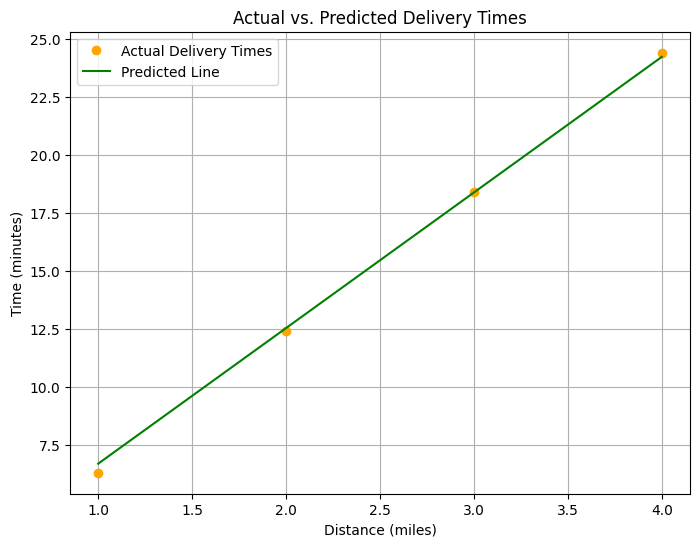

In [23]:
plot_results(model, distances, times)